In [1]:
import pandas as pd
import numpy as np
from numpy import where
import seaborn as sns
from collections import Counter
from copy import deepcopy

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot

import statistics
from statistics import mean 
import time
import json
import os
from os import path
import tempfile

In [90]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
region = 'mwst'
weights_folder = '../model_weights_updated'
results_folder = '../results_updated'

In [3]:
nex_nuqv = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_nex_nuqv.txt", header = None, delim_whitespace=True)
nex_nv2m = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_nex_nv2m.txt", header = None, delim_whitespace=True)
nex_nv10m = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_nex_nv10m.txt", header = None, delim_whitespace=True)
nex_nv500 = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_nex_nv500.txt", header = None, delim_whitespace=True)
nex_nvqv = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_nex_nvqv.txt", header = None, delim_whitespace=True)
nex_nw500 = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_nex_nw500.txt", header = None, delim_whitespace=True)

ex_nuqv = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_ex_nuqv.txt", header = None, delim_whitespace=True)
ex_nv2m = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_ex_nv2m.txt", header = None, delim_whitespace=True)
ex_nv10m = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_ex_nv10m.txt", header = None, delim_whitespace=True)
ex_nv500 = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_ex_nv500.txt", header = None, delim_whitespace=True)
ex_nvqv = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_ex_nvqv.txt", header = None, delim_whitespace=True)
ex_nw500 = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_8005_ex_nw500.txt", header = None, delim_whitespace=True)

nuqv_0619 = pd.read_csv("../data/data_MWST_99/Test_Data/JJA_MWST_0619_nuqv.txt", header = None, delim_whitespace=True)
nv2m_0619 = pd.read_csv("../data/data_MWST_99/Test_Data/JJA_MWST_0619_nv2m.txt", header = None, delim_whitespace=True)
nv10m_0619 = pd.read_csv("../data/data_MWST_99/Test_Data/JJA_MWST_0619_nv10m.txt", header = None, delim_whitespace=True)
nv500_0619 = pd.read_csv("../data/data_MWST_99/Test_Data/JJA_MWST_0619_nv500.txt", header = None, delim_whitespace=True)
nvqv_0619 = pd.read_csv("../data/data_MWST_99/Test_Data/JJA_MWST_0619_nvqv.txt", header = None, delim_whitespace=True)
nw500_0619 = pd.read_csv("../data/data_MWST_99/Test_Data/JJA_MWST_0619_nw500.txt", header = None, delim_whitespace=True)

In [4]:
nex_nq500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nq500.txt", header = None, delim_whitespace=True)
nex_nqv2m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nqv2m.txt", header = None, delim_whitespace=True)
nex_nqv10m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nqv10m.txt", header = None, delim_whitespace=True)
nex_nrh500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nrh500.txt", header = None, delim_whitespace=True)
nex_nrh700 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nrh700.txt", header = None, delim_whitespace=True)
nex_nt2m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nt2m.txt", header = None, delim_whitespace=True)
nex_nt2mdew = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nt2mdew.txt", header = None, delim_whitespace=True)
nex_nt10m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nt10m.txt", header = None, delim_whitespace=True)
nex_nt500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nt500.txt", header = None, delim_whitespace=True)
nex_ntpw = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_ntpw.txt", header = None, delim_whitespace=True)
nex_nu2m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nu2m.txt", header = None, delim_whitespace=True)
nex_nu10m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nu10m.txt", header = None, delim_whitespace=True)
nex_nu500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_nex_nu500.txt", header = None, delim_whitespace=True)


ex_nq500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nq500.txt", header = None, delim_whitespace=True)
ex_nqv2m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nqv2m.txt", header = None, delim_whitespace=True)
ex_nqv10m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nqv10m.txt", header = None, delim_whitespace=True)
ex_nrh500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nrh500.txt", header = None, delim_whitespace=True)
ex_nrh700 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nrh700.txt", header = None, delim_whitespace=True)
ex_nt2m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nt2m.txt", header = None, delim_whitespace=True)
ex_nt2mdew = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nt2mdew.txt", header = None, delim_whitespace=True)
ex_nt10m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nt10m.txt", header = None, delim_whitespace=True)
ex_nt500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nt500.txt", header = None, delim_whitespace=True)
ex_ntpw = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_ntpw.txt", header = None, delim_whitespace=True)
ex_nu2m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nu2m.txt", header = None, delim_whitespace=True)
ex_nu10m = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nu10m.txt", header = None, delim_whitespace=True)
ex_nu500 = pd.read_csv("../MWST_99per/JJA_MWST_99per_8005_ex_nu500.txt", header = None, delim_whitespace=True)



nq500_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nq500.txt", header = None, delim_whitespace=True)
nqv2m_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nqv2m.txt", header = None, delim_whitespace=True)
nqv10m_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nqv10m.txt", header = None, delim_whitespace=True)
nrh500_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nrh500.txt", header = None, delim_whitespace=True)
nrh700_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nrh700.txt", header = None, delim_whitespace=True)
nt2m_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nt2m.txt", header = None, delim_whitespace=True)
nt2mdew_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nt2mdew.txt", header = None, delim_whitespace=True)
nt10m_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nt10m.txt", header = None, delim_whitespace=True)
nt500_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nt500.txt", header = None, delim_whitespace=True)
ntpw_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_ntpw.txt", header = None, delim_whitespace=True)
nu2m_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nu2m.txt", header = None, delim_whitespace=True)
nu10m_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nu10m.txt", header = None, delim_whitespace=True)
nu500_0619 = pd.read_csv("../MWST_99per/Test_Data/JJA_MWST_0619_nu500.txt", header = None, delim_whitespace=True)

In [5]:
indicator_0619 = pd.read_csv("../data/data_MWST_99/JJA_MWST_99per_0619_indicator.txt", header = None, delim_whitespace=True)
test_set_y_initial = indicator_0619[4]
test_y = test_set_y_initial.to_numpy().reshape(1, test_set_y_initial.shape[0])

In [6]:
indicator_0619 = indicator_0619.rename(columns = {0:'ID', 1:'Year', 2:'Month', 3: 'Day Number', 4: 'label'})

In [7]:
nexdays_8005 = pd.read_csv("../data/data_MWST_99/nexday_99per_JJA_MWST_8005.txt", header = None, delim_whitespace=True)
nexdays_8005 = nexdays_8005.rename(columns = {0:'ID', 1:'Year', 2:'Month', 3:'Day Number'})

In [8]:
exdays_8019 = pd.read_csv("../data/data_MWST_99/exinfo_exday_99per_JJA_MWST_2.5x2.txt", header = None, delim_whitespace=True)
exdays_8019 = exdays_8019.rename(columns = {0:'ID', 1:'Year', 2:'Month', 3:'Day Number'})

In [9]:
exdays_8005 = exdays_8019.loc[exdays_8019.Year < 2006]

In [10]:
indicator_8005 = pd.concat([exdays_8005, nexdays_8005]).sort_values(by = "ID")

In [11]:
ex_ids = list(exdays_8005['ID'])
len(ex_ids)

163

In [12]:
indicator_8005['label'] = 0
indicator_8005.loc[indicator_8005.ID.isin(ex_ids), 'label'] = 1

In [13]:
indicator_8005

,ID,Year,Month,Day Number,label
0,1,1980,6,1,0
0,2,1980,6,2,1
1,3,1980,6,3,0
2,4,1980,6,4,0
3,5,1980,6,5,0
...,...,...,...,...,...
2224,2388,2005,8,27,0
2225,2389,2005,8,28,0
2226,2390,2005,8,29,0
2227,2391,2005,8,30,0


In [14]:
indicator_0619

,ID,Year,Month,Day Number,label
0,2393,2006,6,1,0
1,2394,2006,6,2,0
2,2395,2006,6,3,0
3,2396,2006,6,4,0
4,2397,2006,6,5,0
...,...,...,...,...,...
1283,3676,2019,8,27,0
1284,3677,2019,8,28,0
1285,3678,2019,8,29,0
1286,3679,2019,8,30,1


In [15]:
nonext_8005, ext_8005 = np.bincount(indicator_8005['label'])
total = nonext_8005 + ext_8005
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, ext_8005, 100 * ext_8005 / total))

Examples:
    Total: 2392
    Positive: 163 (6.81% of total)



In [16]:
nonext_0619, ext_0619 = np.bincount(indicator_0619['label'])
total = nonext_0619 + ext_0619
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, ext_0619, 100 * ext_0619 / total))

Examples:
    Total: 1288
    Positive: 140 (10.87% of total)



In [17]:
pos = ext_8005 + ext_0619
neg = nonext_8005 + nonext_0619

In [18]:
nexdays_index = (list(nexdays_8005['ID']))
exdays_index = ex_ids

In [70]:
nex_list = [nex_nuqv, nex_nv2m, nex_nv10m, nex_nv500, nex_nvqv, nex_nw500, nex_nq500, nex_nqv2m, 
            nex_nqv10m, nex_nrh500, nex_nrh700, nex_nt2m, nex_nt2mdew, 
            nex_nt10m, nex_nt500, nex_ntpw, nex_nu2m, nex_nu10m, nex_nu500]

ex_list = [ex_nuqv, ex_nv2m,ex_nv10m,ex_nv500,ex_nvqv,ex_nw500, 
           ex_nq500, ex_nqv2m, ex_nqv10m, ex_nrh500, ex_nrh700, ex_nt2m, 
           ex_nt2mdew, ex_nt10m, ex_nt500, ex_ntpw, ex_nu2m, ex_nu10m, ex_nu500]

test_list = [nuqv_0619, nv2m_0619, nv10m_0619, nv500_0619, nvqv_0619, 
             nw500_0619, nq500_0619, nqv2m_0619, nqv10m_0619, nrh500_0619, 
             nrh700_0619, nt2m_0619, nt2mdew_0619, nt10m_0619, nt500_0619, 
            ntpw_0619, nu2m_0619, nu10m_0619, nu500_0619]

In [71]:
for nex in nex_list:
    nex['ID'] = nexdays_index
    nex.set_index('ID', inplace = True)

for ex in ex_list:
    ex['ID'] = exdays_index
    ex.set_index('ID', inplace = True)

In [72]:
def get_train_test_df(nex_names, ex_names, test_names):
    nex_combo_8005 = pd.concat(nex_names, axis = 1)
    nex_combo_8005["label"] = 0

    ex_combo_8005 = pd.concat(ex_names, axis = 1)
    ex_combo_8005["label"] = 1

    combo_8005_df = pd.concat([ex_combo_8005, nex_combo_8005])

    test_df = pd.concat(test_names, axis = 1)
    test_df['label'] = test_y.reshape(test_y.shape[1],)

    return  combo_8005_df, test_df

In [73]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),

]


def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = Sequential()
    
    #add model layers
    model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(20,19,channels), activity_regularizer=l2(0.01)))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(16, kernel_size=3, activation='relu', activity_regularizer=l2(0.001)))
    model.add(MaxPooling2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [74]:
EPOCHS = 100
BATCH_SIZE = 200

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [75]:
rows = 20
cols = 19

In [76]:
def plot_loss(history, n, balance_type, combo, save_fig = False):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train '+balance_type)
  plt.semilogy(history.epoch, history.history['val_loss'],
          color=colors[n], label='Val '+balance_type,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.legend()
  if save_fig == True:
    path = results_folder + '/' + region + '/' + balance_type + '/' + combo
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(path + '/' + 'loss_plot.png')
  
    
    
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non extremes Detected (True Negatives): ', cm[0][0])
  print('Non extremes Incorrectly Detected (False Positives): ', cm[0][1])
  print('Extremes Missed (False Negatives): ', cm[1][0])
  print('Extremes Detected (True Positives): ', cm[1][1])
  print('Total  Extremes: ', np.sum(cm[1]))

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
#   plt.xlim([-0.5,20])
#   plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [77]:
def resample_dataset(train_features, train_labels, bool_train_labels, val_features, val_labels):
    pos_features = train_features[bool_train_labels]
    neg_features = train_features[~bool_train_labels]

    pos_labels = train_labels[bool_train_labels]
    neg_labels = train_labels[~bool_train_labels]
    
    ids = np.arange(len(pos_features))
    choices = np.random.choice(ids, len(neg_features))

    res_pos_features = pos_features[choices]
    res_pos_labels = pos_labels[choices]
    
    resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
    resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

    order = np.arange(len(resampled_labels))
    np.random.shuffle(order)
    resampled_features = resampled_features[order]
    resampled_labels = resampled_labels[order]
    
    BUFFER_SIZE = 1000

    def make_ds(features, labels):
        ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
        ds = ds.shuffle(BUFFER_SIZE).repeat()
        return ds

    pos_ds = make_ds(pos_features, pos_labels)
    neg_ds = make_ds(neg_features, neg_labels)
    
    resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.4, 0.6])
    resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)
    
    for features, label in resampled_ds.take(1):
        print(label.numpy().mean())
    
    val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
    val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 
    
    return resampled_ds, val_ds   

def train_with_balance(resampled_ds, val_ds):
    initial_bias = np.log([pos/neg])
    model = make_model(output_bias=initial_bias)
    initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
    model.save_weights(initial_weights)
    
    resampled_model = make_model()
    resampled_model.load_weights(initial_weights)

    # Reset the bias to zero, since this dataset is balanced.
    output_layer = resampled_model.layers[-1] 
    output_layer.bias.assign([0])
    
    resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)

    resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))
    
    return resampled_history, resampled_model

In [78]:
def train_no_balance(train_features, train_labels, val_features, val_labels):
    initial_bias = np.log([pos/neg])
    model = make_model(output_bias=initial_bias)
    initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
    model.save_weights(initial_weights)
    
    model = make_model()
    model.load_weights(initial_weights)
    
    baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))
    
    return baseline_history, model

In [79]:
def var_analysis(nex_names, ex_names, test_names, oversample = True):
    train_df, test_df = get_train_test_df(nex_names, ex_names, test_names)
    
    complete_train_df = train_df.copy(deep = True)
    complete_test_df = test_df.copy(deep = True)
    
    train_df, val_df = train_test_split(train_df, test_size=0.2)
    
    train_labels = np.array(train_df.pop('label'))
    bool_train_labels = train_labels != 0
    val_labels = np.array(val_df.pop('label'))
    test_labels = np.array(test_df.pop('label'))

    train_features = np.array(train_df)
    val_features = np.array(val_df)
    test_features = np.array(test_df)
    
    channels = len(nex_names)
    
    train_features = train_features.reshape(train_features.shape[0], rows, cols, channels)
    val_features = val_features.reshape(val_features.shape[0], rows, cols, channels)
    test_features = test_features.reshape(test_features.shape[0], rows, cols, channels)
    
    if oversample == True:
        resampled_ds, val_ds = resample_dataset(train_features, train_labels, bool_train_labels, 
                                                val_features, val_labels)
        
        resampled_history, resampled_model = train_with_balance(resampled_ds, val_ds)
#         loss_plot = plot_loss(resampled_history, "Oversampled", 1)
        
        train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
        test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
        
        resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)

        for name, value in zip(resampled_model.metrics_names, resampled_results):
              print(name, ': ', value)
        print()
        plot_cm(test_labels, test_predictions_resampled)
        
        return resampled_history, resampled_model, complete_train_df, complete_test_df
    
    if oversample == False:
        baseline_history, baseline_model = train_no_balance(train_features, train_labels, val_features, val_labels)
#         loss_plot = plot_loss(baseline_history, "No Balance", 1)
        train_predictions_baseline = baseline_model.predict(train_features, batch_size=BATCH_SIZE)
        test_predictions_baseline = baseline_model.predict(test_features, batch_size=BATCH_SIZE)
        baseline_results = baseline_model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
        for name, value in zip(baseline_model.metrics_names, baseline_results):
              print(name, ': ', value)
        print()

        plot_cm(test_labels, test_predictions_baseline)
        
        return baseline_history, baseline_model, complete_train_df, complete_test_df

In [80]:
def sort_train(unsorted_df, channels):
    sorted_df = unsorted_df.sort_index()
    train_data = sorted_df.iloc[:,0:sorted_df.shape[1]-1].to_numpy()
    train_data = train_data.reshape(train_data.shape[0], rows, cols, channels)
    train_labels = sorted_df['label'].to_numpy()
    
    
    return train_data, train_labels

In [81]:
def gen_table(model, data, indicator, balance_type, combo, train_or_test, channels, save_table = False):
    
#     data = np.array(df.drop('label', axis = 1))
#     data = data.reshape(data.shape[0], rows, cols, channels)
    predictions = model.predict(data)
    print(predictions.shape)
    predictions = predictions.reshape(predictions.shape[0],)
    predictions[predictions > 0.5] = 1
    predictions[predictions <= 0.5] = 0
    
    print(np.sum(predictions))
    
    table = indicator.copy(deep = True)
    
    table['CNN Prediction'] = predictions
    
    if save_table == True:
        path = results_folder + '/' + region + '/' + balance_type + '/' + combo
        if not os.path.exists(path):
            os.makedirs(path)
        table.to_csv(path + '/' + 'sequence_table_' + train_or_test +'.csv', index = False)
    
    return table

In [82]:
def save_weights(model, balance_type, variable):
    path = weights_folder + '/' + region + '/' + balance_type + '/' + variable + '/' + variable
    if not os.path.exists(path):
        os.makedirs(path)
    model.save_weights(path)

In [83]:
no_balance = 'no_balance'
oversampled = 'oversampled'
color_number = 1

In [84]:
baseline_histories = []
baseline_models = []
oversampled_histories = []
oversampled_models = []
cal_dfs = []
val_dfs = []

In [86]:
nex_list = [nex_nuqv, nex_nv2m, nex_nv10m, nex_nv500, nex_nvqv, nex_nw500, nex_nq500, nex_nqv2m, 
            nex_nqv10m, nex_nrh500, nex_nrh700, nex_nt2m, nex_nt2mdew, 
            nex_nt10m, nex_nt500, nex_ntpw, nex_nu2m, nex_nu10m, nex_nu500]

ex_list = [ex_nuqv, ex_nv2m,ex_nv10m,ex_nv500,ex_nvqv,ex_nw500, 
           ex_nq500, ex_nqv2m, ex_nqv10m, ex_nrh500, ex_nrh700, ex_nt2m, 
           ex_nt2mdew, ex_nt10m, ex_nt500, ex_ntpw, ex_nu2m, ex_nu10m, ex_nu500]

test_list = [nuqv_0619, nv2m_0619, nv10m_0619, nv500_0619, nvqv_0619, 
             nw500_0619, nq500_0619, nqv2m_0619, nqv10m_0619, nrh500_0619, 
             nrh700_0619, nt2m_0619, nt2mdew_0619, nt10m_0619, nt500_0619, 
            ntpw_0619, nu2m_0619, nu10m_0619, nu500_0619]

# Keep changing variable in the cell box

In [177]:
variable = 'nrh500'
nex_names = [nex_nrh500]
ex_names = [ex_nrh500]
test_names = [nrh500_0619]
channels = 1

Epoch 1/100
10/10 [==============================] - 1s 129ms/step - loss: 2.8800 - tp: 44.0000 - fp: 248.0000 - tn: 2684.0000 - fn: 225.0000 - accuracy: 0.8522 - precision: 0.1507 - recall: 0.1636 - auc: 0.5565 - val_loss: 2.3039 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3948
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 1.9245 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4568 - val_loss: 1.6063 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4208
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 1.3886 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.

Epoch 21/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3121 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5582 - val_loss: 0.3157 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5389
Epoch 22/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3057 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5649 - val_loss: 0.3100 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5493
Epoch 23/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3001 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 

Epoch 41/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2590 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7039 - val_loss: 0.2697 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6419
Epoch 42/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2581 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7061 - val_loss: 0.2690 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6497
Epoch 43/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2572 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 

Epoch 61/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2452 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7625 - val_loss: 0.2604 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6590
Epoch 62/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2445 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7627 - val_loss: 0.2602 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6620
Epoch 63/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2440 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 

Epoch 81/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2340 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7830 - val_loss: 0.2557 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6898
Epoch 82/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2338 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7909 - val_loss: 0.2546 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 445.0000 - val_fn: 34.0000 - val_accuracy: 0.9290 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6954
Epoch 83/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2329 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1784.0000 - fn: 129.0000 - accuracy: 0.9326 

loss :  0.3310542106628418
tp :  0.0
fp :  0.0
tn :  1148.0
fn :  140.0
accuracy :  0.8913043737411499
precision :  0.0
recall :  0.0
auc :  0.7399762868881226

Non extremes Detected (True Negatives):  1148
Non extremes Incorrectly Detected (False Positives):  0
Extremes Missed (False Negatives):  140
Extremes Detected (True Positives):  0
Total  Extremes:  140


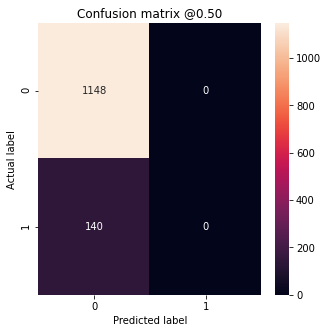

In [178]:
baseline_history, baseline_model, cal_df, val_df =  var_analysis(nex_names,ex_names, 
                                                                            test_names, 
                                                                            oversample = False)
# baseline_histories.append(baseline_history), baseline_models.append(baseline_model)

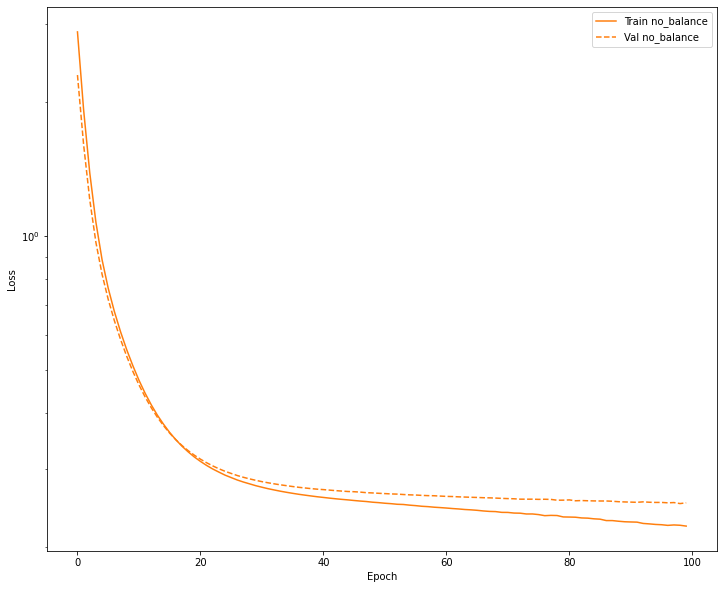

In [179]:
plot_loss(baseline_history, color_number, no_balance, variable, save_fig = True)

In [180]:
save_weights(baseline_model, no_balance, variable)

In [181]:
train_data, train_labels = sort_train(cal_df, channels = channels)
test_data = np.array(val_df.iloc[:,:-1]).reshape(val_df.shape[0], rows, cols, channels)
train_table = gen_table(baseline_model, train_data, indicator_8005, no_balance, variable, 'train', channels = channels,
                        save_table = True)
test_table = gen_table(baseline_model, test_data, indicator_0619, no_balance, variable, 'test', channels = channels,
                       save_table = True)

(2392, 1)
1.0
(1288, 1)
0.0


0.395
Epoch 1/1000
20/20 [==============================] - 1s 70ms/step - loss: 3.1765 - tp: 276.0000 - fp: 143.0000 - tn: 3397.0000 - fn: 1472.0000 - accuracy: 0.6946 - precision: 0.6587 - recall: 0.1579 - auc: 0.7380 - val_loss: 2.1675 - val_tp: 3.0000 - val_fp: 15.0000 - val_tn: 429.0000 - val_fn: 32.0000 - val_accuracy: 0.9019 - val_precision: 0.1667 - val_recall: 0.0857 - val_auc: 0.6303
Epoch 2/1000
20/20 [==============================] - 0s 14ms/step - loss: 1.8706 - tp: 332.0000 - fp: 88.0000 - tn: 2280.0000 - fn: 1300.0000 - accuracy: 0.6530 - precision: 0.7905 - recall: 0.2034 - auc: 0.7993 - val_loss: 1.3516 - val_tp: 3.0000 - val_fp: 13.0000 - val_tn: 431.0000 - val_fn: 32.0000 - val_accuracy: 0.9061 - val_precision: 0.1875 - val_recall: 0.0857 - val_auc: 0.6874
Epoch 3/1000
20/20 [==============================] - 0s 14ms/step - loss: 1.2864 - tp: 398.0000 - fp: 90.0000 - tn: 2305.0000 - fn: 1207.0000 - accuracy: 0.6758 - precision: 0.8156 - recall: 0.2480 - auc: 0.8146 

Epoch 22/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.4744 - tp: 1208.0000 - fp: 305.0000 - tn: 2114.0000 - fn: 373.0000 - accuracy: 0.8305 - precision: 0.7984 - recall: 0.7641 - auc: 0.9038 - val_loss: 0.4228 - val_tp: 16.0000 - val_fp: 50.0000 - val_tn: 394.0000 - val_fn: 19.0000 - val_accuracy: 0.8559 - val_precision: 0.2424 - val_recall: 0.4571 - val_auc: 0.7698
Epoch 23/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.4682 - tp: 1132.0000 - fp: 290.0000 - tn: 2166.0000 - fn: 412.0000 - accuracy: 0.8245 - precision: 0.7961 - recall: 0.7332 - auc: 0.9046 - val_loss: 0.4258 - val_tp: 17.0000 - val_fp: 57.0000 - val_tn: 387.0000 - val_fn: 18.0000 - val_accuracy: 0.8434 - val_precision: 0.2297 - val_recall: 0.4857 - val_auc: 0.7719
Epoch 24/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.4639 - tp: 1208.0000 - fp: 309.0000 - tn: 2114.0000 - fn: 369.0000 - accuracy: 0.8305 - precision: 0.7963 - recall: 0.7660 - auc: 0.9084

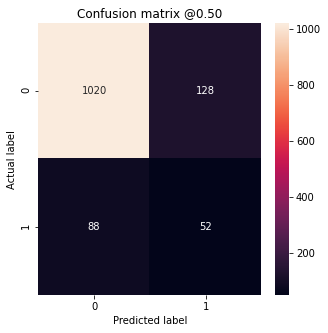

In [182]:
oversampled_history, oversampled_model, cal_df, val_df =  var_analysis(nex_names,ex_names, test_names, 
                                                                                            oversample = True) 
                                                                                                        

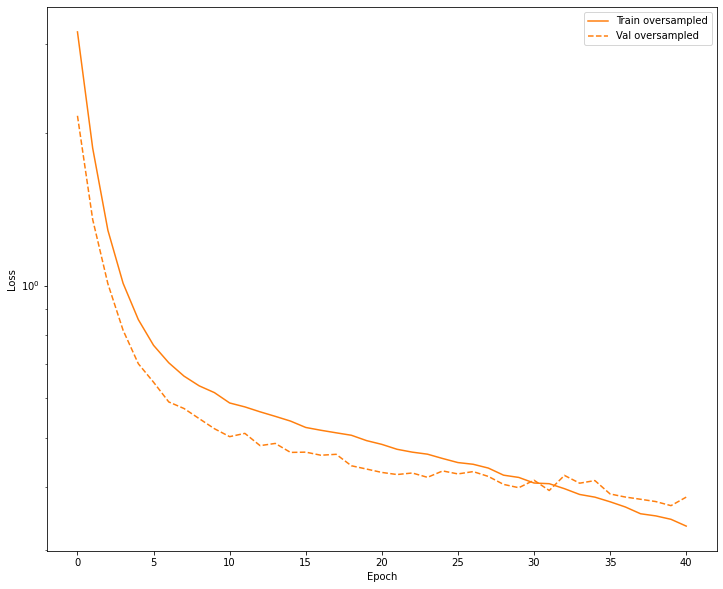

In [183]:
plot_loss(oversampled_history, color_number, oversampled, variable, save_fig = True)

In [184]:
save_weights(oversampled_model, oversampled, variable)

In [185]:
train_data, train_labels = sort_train(cal_df, channels = channels)
test_data = np.array(val_df.iloc[:,:-1]).reshape(val_df.shape[0], rows, cols, channels)
train_table = gen_table(oversampled_model, train_data, indicator_8005, oversampled, variable, 'train', channels = channels,
                        save_table = True)
test_table = gen_table(oversampled_model, test_data, indicator_0619, oversampled, variable, 'test', channels = channels,
                       save_table = True)

(2392, 1)
385.0
(1288, 1)
180.0


In [186]:
train_table[(train_table['label'] == 1) & (train_table['CNN Prediction'] == 1)].shape

(124, 6)

In [187]:
test_table[(test_table['label'] == 1) & (test_table['CNN Prediction'] == 1)].shape

(52, 6)

In [188]:
test_table

,ID,Year,Month,Day Number,label,CNN Prediction
0,2393,2006,6,1,0,0.0
1,2394,2006,6,2,0,0.0
2,2395,2006,6,3,0,0.0
3,2396,2006,6,4,0,0.0
4,2397,2006,6,5,0,0.0
...,...,...,...,...,...,...
1283,3676,2019,8,27,0,0.0
1284,3677,2019,8,28,0,0.0
1285,3678,2019,8,29,0,0.0
1286,3679,2019,8,30,1,0.0
